##1. Решение уравнения

$$ y^4 = 1 $$

Для решения сначала переведем правую часть в комплексную форму

$$ 1 = \cos0 + i \sin0 $$

и воспользуемся формулой 

$$ \zeta = p(\cos\psi + i\sin\psi) \\
\sqrt[n]{\zeta} = \{ \sqrt[n]{p}(\cos{\frac{\psi+2\pi k}{n}} + i\sin{\frac{\psi+2\pi k}{n}}), k = 0, .., n-1  \}
$$

Тогда 
$$ y = \sqrt[4]{1} = \cos{\frac{2\pi k}{4}} + i\sin{\frac{2\pi k}{4}}, k = 0, ..,3 \\
y_o = \cos0 + i\sin0 = 1 \\
y_1 = \cos{\frac{\pi}{2}} + i\sin{\frac{\pi}{2}} = i \\
y_2 = \cos{\pi} + i\sin{\pi} = -1 \\
y_3 = \cos{\frac{3\pi}{4}} + i\sin{\frac{3\pi}{4}} = -i 
$$

In [1]:
import numpy as np

import sympy as sym
from IPython.display import display, Latex

import matplotlib.pyplot as plt

from scipy.integrate import odeint

## 2. Исследование системы уравнений.

### Система уравнений 1

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= -x - 2y \\
\frac{dy}{dt} &= x + y
\end{aligned}
\right.
$$

In [82]:
P1 = lambda x,y: -x - 2*y
Q1 = lambda x,y: x + y
fun1 = lambda p,t: [ P1(p[0],p[1]), Q1(p[0],p[1]) ]

Решаем уравнение

In [83]:
tt = np.linspace(0,100, 1000)
xy0 = [1,0]
zz = odeint(fun1, xy0, tt)

Строим кривую на фазовой плоскости

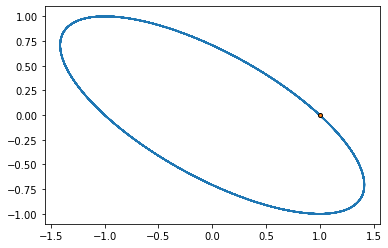

In [41]:
plt.plot(zz[:,0], zz[:,1])
plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)
None

Строим графики кинетик

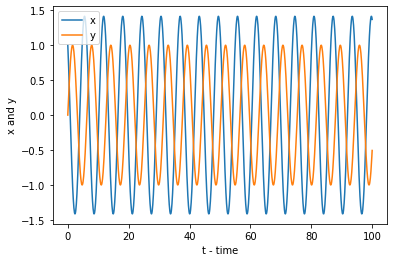

In [47]:
plt.plot(tt, zz[:,0], label="x")
plt.plot(tt, zz[:,1], label="y")
plt.legend()
plt.xlabel("t - time")
plt.ylabel("x and y")
plt.show()

Рисуем векторное поле

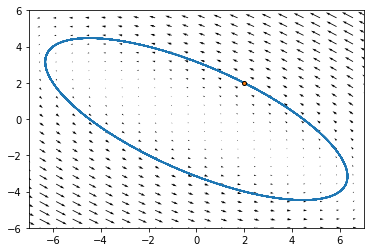

In [92]:
xy0 = [2,2]
zz = odeint(fun1, xy0, tt)

xx = np.linspace(-10, 10, 30)
yy = np.linspace(-6,8,30)
Xm,Ym = np.meshgrid(xx,yy)
plt.plot(zz[:,0], zz[:,1])
plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)
plt.quiver(Xm,Ym, P1(Xm,Ym), Q1(Xm,Ym), scale_units='xy', angles='xy')
plt.xlim(-7, 7)
plt.ylim(-6, 6)
None

Для этой системы уравнений очень легко посчитать матрицу Якоби, по сути это коэффициенты при $x$ и $y$.

$$
J = \left[ \begin{matrix}
-1 & -2 \\
1 & 1 
\end{matrix} \right]
$$

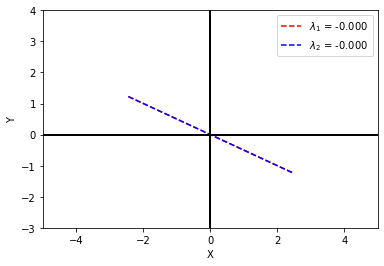

In [6]:
mtx = np.array([[-1, -2],[1, 1]])
vals, vecs = np.linalg.eig(mtx)

vals = vals
vecs = np.real(vecs)

plt.plot([vecs[0,0]*-3, vecs[0,0]*3] , [vecs[1,0]*-3, vecs[1,0]*3], 
             '--r', label='$\lambda_1$ = %.3f' % vals[0].real)
plt.plot([vecs[0,1]*-3, vecs[0,1]*3] , [vecs[1,1]*-3, vecs[1,1]*3], 
             '--b', label='$\lambda_2$ = %.3f' % vals[1].real)

# decorations
plt.plot([0,0],[-10,10], 'k-', lw=2)
plt.plot([-10,10],[0,0], 'k-', lw=2)
plt.legend()
plt.xlim(-5,5)
plt.ylim(-3,4)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [7]:
print(vals, np.real(vals))


[-9.71445147e-17+1.j -9.71445147e-17-1.j] [-9.71445147e-17 -9.71445147e-17]


Два собственных числа совпадают и и их действительные части равны нулю, а мнимые равны $i$ и $-i$. 

### Система уравнений 2.

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= -3x - 2y \\
\frac{dy}{dt} &= 5x + y
\end{aligned}
\right.
$$

In [93]:
P2 = lambda x,y: -3*x - 2*y
Q2 = lambda x,y: 5*x + y
fun2 = lambda p,t: [ P2(p[0],p[1]), Q2(p[0],p[1]) ]

Решаем уравнение

In [94]:
tt = np.linspace(0,100, 1000)
xy0 = [1,0]
zz = odeint(fun2, xy0, tt)

Строим кривую на фазовой плоскости

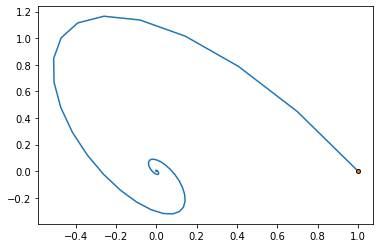

In [77]:
plt.plot(zz[:,0], zz[:,1])
plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)
None

Строим графики кинетик

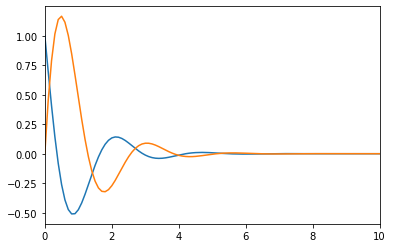

In [ ]:
plt.plot(tt, zz[:,0])
plt.plot(tt, zz[:,1])
plt.xlim(0, 10)
None

Рисуем векторное поле

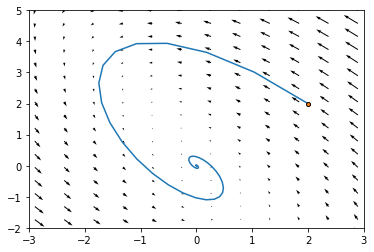

In [100]:
xy0 = [2,2]
zz = odeint(fun2, xy0, tt)

plt.plot(zz[:,0], zz[:,1])
plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

xx = np.linspace(-5,5,20)
yy = np.linspace(-3,5,20)

Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P2(Xm,Ym), Q2(Xm,Ym), scale_units='xy', angles='xy')
plt.xlim(-3, 3)
plt.ylim(-2, 5)
plt.show()

Матрица Якоби системы уравнений

$$
J = \left[ \begin{matrix}
-3 & -2 \\
5 & 1 
\end{matrix} \right]
$$

[-1.+2.44948974j -1.-2.44948974j]
[-1.+2.44948974j -1.-2.44948974j]


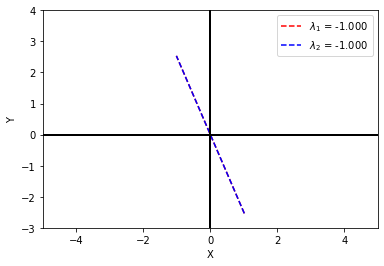

In [ ]:
mtx = np.array([[-3, -2],[5, 1]])
vals, vecs = np.linalg.eig(mtx)
print(vals)
# vals = np.real(vals)
vecs = np.real(vecs)
print(vals)
plt.plot([vecs[0,0]*-3, vecs[0,0]*3] , [vecs[1,0]*-3, vecs[1,0]*3], 
             '--r', label='$\lambda_1$ = %.3f' % vals[0].real)
plt.plot([vecs[0,1]*-3, vecs[0,1]*3] , [vecs[1,1]*-3, vecs[1,1]*3], 
             '--b', label='$\lambda_2$ = %.3f' % vals[1].real)

# decorations
plt.plot([0,0],[-10,10], 'k-', lw=2)
plt.plot([-10,10],[0,0], 'k-', lw=2)
plt.legend()
plt.xlim(-5,5)
plt.ylim(-3,4)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### Система уравнений 3

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= -5x - 2y \\
\frac{dy}{dt} &= -x + y
\end{aligned}
\right.
$$

In [101]:
P3 = lambda x,y: -5*x - 2*y
Q3 = lambda x,y: -x + y
fun3 = lambda p,t: [ P3(p[0],p[1]), Q3(p[0],p[1]) ]

Решаем уравнение

In [102]:
tt = np.linspace(0,100, 1000)
xy0 = [1,0]
zz = odeint(fun3, xy0, tt)

Строим кривую на фазовой плоскости

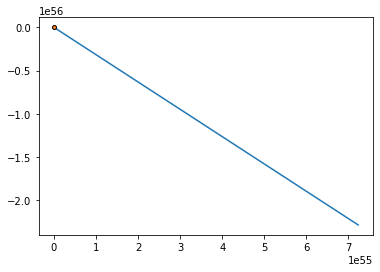

In [103]:
plt.plot(zz[:,0], zz[:,1])
plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)
None

Строим графики кинетик

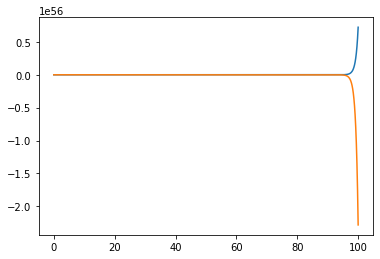

In [104]:
plt.plot(tt, zz[:,0])
plt.plot(tt, zz[:,1])
None

Рисуем векторное поле

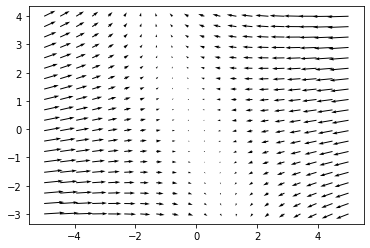

In [106]:
xx = np.linspace(-5,5,20)
yy = np.linspace(-3,4,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P3(Xm,Ym), Q3(Xm,Ym), scale_units='xy', angles='xy')
None

Для этой системы уравнений очень легко посчитать матрицу Якоби, по сути это коэффициенты при $x$ и $y$.

$$
J = \left[ \begin{matrix}
-5 & -2 \\
-1 & 1 
\end{matrix} \right]
$$

[-5.31662479  1.31662479]
[-5.31662479  1.31662479]


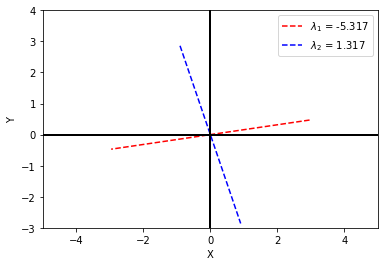

In [ ]:
mtx = np.array([[-5, -2],[-1, 1]])
vals, vecs = np.linalg.eig(mtx)
print(vals)
vals = np.real(vals)
vecs = np.real(vecs)
print(vals)
plt.plot([vecs[0,0]*-3, vecs[0,0]*3] , [vecs[1,0]*-3, vecs[1,0]*3], 
             '--r', label='$\lambda_1$ = %.3f' % vals[0])
plt.plot([vecs[0,1]*-3, vecs[0,1]*3] , [vecs[1,1]*-3, vecs[1,1]*3], 
             '--b', label='$\lambda_2$ = %.3f' % vals[1])

# decorations
plt.plot([0,0],[-10,10], 'k-', lw=2)
plt.plot([-10,10],[0,0], 'k-', lw=2)
plt.legend()
plt.xlim(-5,5)
plt.ylim(-3,4)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### Система уравнений с параметром

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= y - px \\
\frac{dy}{dt} &= -px + y
\end{aligned}
\right.
$$

In [8]:
def display2Deq(eq1, eq2):
    s = \
    r'''$$
    \left\{
    \begin{aligned}
        %s \\
        %s
    \end{aligned}
    \right.
    $$''' % (sym.latex(eq1).replace('=','&='), sym.latex(eq2).replace('=','&='))
    display(Latex(s))



In [9]:
x, y, x0, y0, p, t = sym.symbols("x,y,x0,y0,p,t")
x = sym.Function("x")(t)
y = sym.Function("y")(t)

x_rate = y - p*x
y_rate = -p*x + y

eq1 = sym.Eq(x.diff(t), x_rate)
eq2 = sym.Eq(y.diff(t), y_rate)

display2Deq(eq1, eq2)

<IPython.core.display.Latex object>

In [10]:
sol_eqs = sym.dsolve([eq1, eq2], 
                     ics={x.subs(t,0):x0,
                          y.subs(t,0):y0})
for sol in sol_eqs:
  display(sol)

Eq(x(t), -x0/(p - 1) + y0/(p - 1) + (p*x0/(p - 1) - y0/(p - 1))*exp(-t*(p - 1)))

Eq(y(t), -p*x0/(p - 1) + p*y0/(p - 1) + (p*x0/(p - 1) - y0/(p - 1))*exp(-t*(p - 1)))

Если посмотреть на решения системы уравнений, видно, что обе функции являются полностью действительными без иррационнальной части. Есть условие, что параметр $p \neq 0$, так как знаменатель не должен обращаться в ноль. Построим графики решений в зависимости от p.


In [11]:
xlam = sym.lambdify([t,p,x0,y0],sol_eqs[0].rhs)
ylam = sym.lambdify([t,p,x0,y0],sol_eqs[1].rhs)

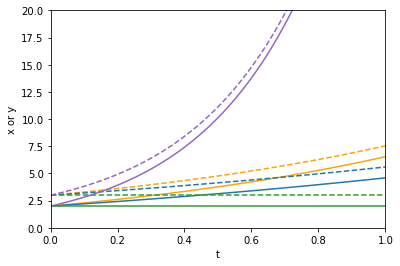

In [12]:
colors = ["orange", "tab:blue", "tab:green", "tab:purple"]
for i, pv in enumerate([0.1, 0.5, 1.5, -2]):
    tt = np.linspace(0,1,100)
    xx = xlam(tt, pv, 2, 3)
    yy = ylam(tt, pv, 2, 3)

    plt.plot(tt, xx, '-', color=colors[i])
    plt.plot(tt, yy, '--', color=colors[i])
plt.xlim(0,1)
plt.ylim(0,20)
plt.xlabel('t')
plt.ylabel('x or y')
plt.show()

Построим решения в фазовом пространстве

Text(0, 0.5, 'y')

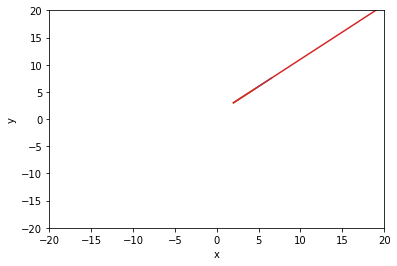

In [13]:
for i, pv in enumerate([0.1, 0.5, 1.5, -2]):
    tt = np.linspace(0,1,100)
    xx = xlam(tt, pv, 2, 3)
    yy = ylam(tt, pv, 2, 3)

    plt.plot(xx, yy)

plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel('x')
plt.ylabel('y')

Ожидаемый график, учитывая, что уравнения $x' = -px + y$ и $y' = -px + y$ совпадают.

#### Анализ устойчивости решений

Для анализа устойчивости нужно прировнять оба уравнения нулю и найти решения. Учитывая, что оба уравнения совпадают, система уравнений оказывается вырожденной.

In [14]:
display2Deq(
    sym.Eq(0, x_rate), 
    sym.Eq(0, y_rate) )

<IPython.core.display.Latex object>

В результате получается множество решений

In [15]:
sym.nonlinsolve([x_rate, y_rate], [x,y])

FiniteSet((y(t)/p, y(t)))

In [16]:
J = sym.Matrix([x_rate, y_rate]).jacobian(sym.Matrix([x, y]))
display(J)

Matrix([
[-p, 1],
[-p, 1]])

In [ ]:
J.eigenvects()

[(0, 1, [Matrix([
   [1/p],
   [  1]])]), (1 - p, 1, [Matrix([
   [1],
   [1]])])]

Получилось два собственных числа кратности 1.

Нарисуем графики зависимости значения собственных векторов от параметра $p$. Первое собственное значение не зависит от $p$, поэтому просто зададим его массивом нулей длины 100. 

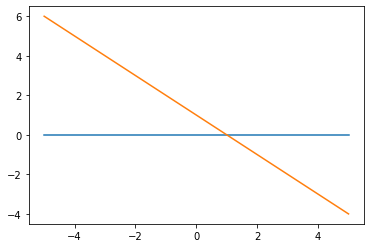

In [ ]:
lam = sym.lambdify(p, sym.re(J.eigenvects()[1][0]) )

pp = np.linspace(-5,5,100)
ee = np.zeros(100)
plt.plot(pp, ee)
plt.plot(pp, lam(pp))
plt.show()

При любых $p$ одно из решений всегда равно 0, при $p = 1$ оба собственных значения совпадают и равны 0, при $p > 1$ одно из собственных значений меньше 0.

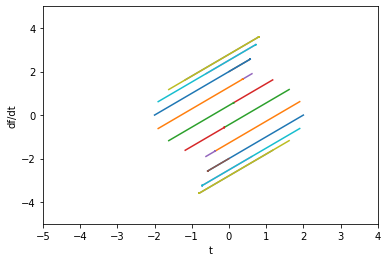

In [18]:
for pv in [4.5]:
  for i in np.arange(0, 2*np.pi, np.pi/10):
    tt = np.linspace(0, 10,100)
    xx = xlam(tt, pv, 2*np.cos(i), 2*np.sin(i))
    yy = ylam(tt, pv, 2*np.cos(i), 2*np.sin(i))

    plt.plot(xx, yy)

plt.xlim(-5, 4)
plt.ylim(-5, 5)
plt.xlabel("t")

plt.ylabel("df/dt")
plt.show()

### Система уравнений с параметром - 2

Посмотрим, как поведет себя система уравнений с параметром, если уравнения не будут совпадать

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= x - py \\
\frac{dy}{dt} &= -px + y
\end{aligned}
\right.
$$

In [20]:
x_rate = x - p*y
y_rate = -p*x + y

eq1 = sym.Eq(x.diff(t), x_rate)
eq2 = sym.Eq(y.diff(t), y_rate)

display2Deq(eq1, eq2)

<IPython.core.display.Latex object>

In [21]:
sol_eqs = sym.dsolve([eq1, eq2], 
                     ics={x.subs(t,0):x0,
                          y.subs(t,0):y0})
for sol in sol_eqs:
  display(sol)

Eq(x(t), (x0/2 - y0/2)*exp(t*(p + 1)) + (x0/2 + y0/2)*exp(-t*(p - 1)))

Eq(y(t), -(x0/2 - y0/2)*exp(t*(p + 1)) + (x0/2 + y0/2)*exp(-t*(p - 1)))

In [22]:
xlam = sym.lambdify([t,p,x0,y0],sol_eqs[0].rhs)
ylam = sym.lambdify([t,p,x0,y0],sol_eqs[1].rhs)

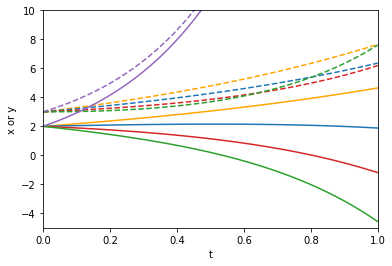

In [27]:
colors = ["orange", "tab:blue", "tab:red", "tab:green", "tab:purple"]
for i, pv in enumerate([0.1, 0.5, 1, 1.5, -2]):
    tt = np.linspace(0,1,100)
    xx = xlam(tt, pv, 2, 3)
    yy = ylam(tt, pv, 2, 3)

    plt.plot(tt, xx, '-', color=colors[i])
    plt.plot(tt, yy, '--', color=colors[i])
plt.xlim(0,1)
plt.ylim(-5,10)
plt.xlabel('t')
plt.ylabel('x or y')
plt.show()

Построим решения в фазовом пространстве

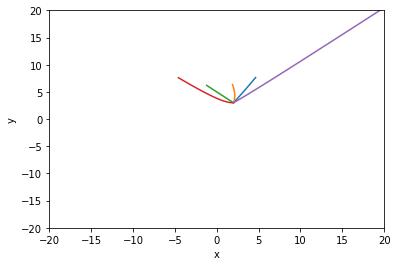

In [29]:
for i, pv in enumerate([0.1, 0.5, 1, 1.5, -2]):
    tt = np.linspace(0,1,100)
    xx = xlam(tt, pv, 2, 3)
    yy = ylam(tt, pv, 2, 3)

    plt.plot(xx, yy)

plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Анализ устойчивости решений

Для анализа устойчивости нужно прировнять оба уравнения нулю и найти решения. 

In [30]:
display2Deq(
    sym.Eq(0, x_rate), 
    sym.Eq(0, y_rate) )

<IPython.core.display.Latex object>

В результате получается единственное решение.

In [31]:
sym.nonlinsolve([x_rate, y_rate], [x,y])

FiniteSet((0, 0))

In [32]:
J = sym.Matrix([x_rate, y_rate]).jacobian(sym.Matrix([x, y]))
display(J)

Matrix([
[ 1, -p],
[-p,  1]])

In [33]:
J.eigenvects()

[(1 - p, 1, [Matrix([
   [1],
   [1]])]), (p + 1, 1, [Matrix([
   [-1],
   [ 1]])])]

Получилось два собственных числа кратности 1.

Нарисуем графики зависимости значения собственных векторов от параметра $p$.  

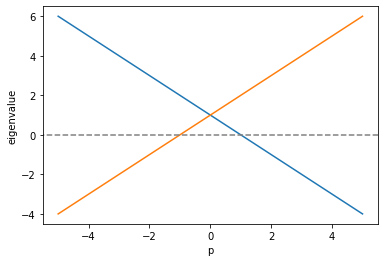

In [37]:
lam0 = sym.lambdify(p, sym.re(J.eigenvects()[0][0]) )
lam1 = sym.lambdify(p, sym.re(J.eigenvects()[1][0]) )

pp = np.linspace(-5,5,100)
plt.plot(pp, lam0(pp))
plt.plot(pp, lam1(pp))
plt.xlabel("p")
plt.ylabel("eigenvalue")
plt.axhline(0, -4, 4, color="grey", linestyle="--")
plt.show()

Видно, что оба собственных значения никогда не становятся отрицательными одновременно, т.е. у системы уравнений нет устойчивых решений.

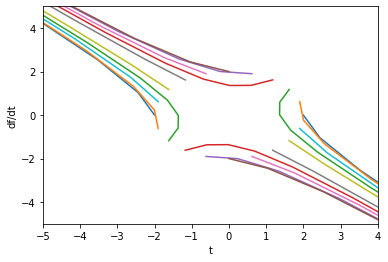

In [38]:
for pv in [4.5]:
  for i in np.arange(0, 2*np.pi, np.pi/10):
    tt = np.linspace(0, 10,100)
    xx = xlam(tt, pv, 2*np.cos(i), 2*np.sin(i))
    yy = ylam(tt, pv, 2*np.cos(i), 2*np.sin(i))

    plt.plot(xx, yy)

plt.xlim(-5, 4)
plt.ylim(-5, 5)
plt.xlabel("t")

plt.ylabel("df/dt")
plt.show()